Логистическая регрессия и метод ближайших соседей

Цель работы: получение практических навыков использования модели логистической регрессии и метода ближайших соседей.

Логистическая регрессия

Метод логистической регрессии является мощным инструментом для бинарной классификации, обеспечивая простоту в интерпретации и применении. Однако для достижения лучшей производительности требуется тщательный выбор признаков и проверка предположений модели.

Логистическая регрессия — это статистический метод, используемый для бинарной классификации. Он предсказывает вероятность принадлежности объекта к определенному классу на основе входных признаков.
Логистическая регрессия использует логистическую функцию (сигмоиду), чтобы преобразовать линейную комбинацию входных признаков в вероятность.
Модель логистической регрессии: $$ \hat y = \sigma (Xw). $$
Сигмоида меняется в пределах от 0 до 1 и имеет вид: $$ \sigma(x) = \frac{1}{1+e^{-x}}. $$ -- Функция потерь log-loss: $$ L = -\frac{1}{\ell}\sum_{i = 1}^{\ell}(y_i\log(\hat y_i) + (1 - y_i)\log(1 - \hat y_i)), $$ где 
ℓ
 - количество объектов. -- Регуляризация вводится таким же образом, как это было в случае линейной регрессии. Например, функция потерь для 
L
-$2$ регуляризации выглядит так: $$ \bar{L}(X, w) = L(X, w) + \frac{1}{2}\lambda|w|^2_2. $$
Коэффициенты модели алгоритм находит с помощью метода максимального правдоподобия, который максимизирует вероятность наблюдаемых данных, исходя из модели.
Классификация производится путем установки порога (например, 0.5) для вероятностей. Если предсказанная вероятность превышает порог, объект классифицируется в один класс, иначе — в другой.
Логистическая регрессия используется в различных областях, например:
Медицина (для диагностики болезней);
Финансовые услуги (для оценки кредитного риска);
Маркетинг (для прогноза успеха рекламных кампаний).
Преимущества:
Простота и интерпретируемость модели.
Быстрая и эффективная при малом количестве признаков.
Легко адаптируется для многоклассовой классификации с помощью методов, таких как "один против всех".
Недостатки:
Предположение о линейности отношений в логарифмической шкале.
Неэффективна при наличии сложных нелинейных зависимостей без дополнительной обработки (например, полиномиальные признаки).
Чувствительность к мультиколлинеарности (высокой корреляции между независимыми переменными).

Метод ближайших соседей

Метод ближайших соседей (k-NN) является мощным инструментом для классификации и регрессии, однако его эффективность и точность зависят от правильного выбора параметров и методов обработки данных. Для многих задач может потребоваться предварительная обработка данных и оптимизация для достижения наилучших результатов.
Для классификации нового объекта алгоритм k-NN ищет k ближайших к нему соседей в обучающей выборке, основываясь на заданной метрике расстояния.
Класс нового объекта определяется по большинству голосов его ближайших соседей (например, класс, который чаще всего встречается среди соседей).
Наиболее распространенными метриками расстояний являются:
Евклидово расстояние: 
d
(
p
,
q
)

∑
i

1
n
(
p
i
−
q
i
)
2
Манхэттенское расстояние: 
d
(
p
,
q
)

∑
i
1
n
|
p
i
−
q
i
|
Расстояние Минко
1
n
|
p
i
−
q
i
|
r
)
1
/
r
 где 
r
 — параметр, определяющий тип расстояния).
Параметр k (количество соседей) является критически важным для работы алгоритма:
Небольшие значения k могут приводить к переобучению (алгоритм очень чувствителен к шуму).
Большие значения k могут приводить к недообучению (общее усреднение данных).

Новый объект классифицируется на основе классов его ближайших соседей. Каждому соседу присваивается вес по частоте его класса, и выбирается класс с наибольшим голосом.
Взвешенные методы могут использоваться для улучшения точности классификации, где соседи, находящиеся ближе, могут иметь больший вес.
Метод k-NN демонстрирует снижение эффективности с увеличением числа измерений, что называется "проклятием размерности". Это связано с тем, что расстояния между точками становятся менее различимыми в высоких дименсиях.
Метод k-NN широко используется в:
Распознавании образов (например, в задачах компьютерного зрения);
Рекомендательных системах;
Медицинской диагностике;
Классификации текстов и многом другом.
Преимущества:
Простота реализации и понимания.
Нет необходимости в обучении (алгоритм использует все доступные данные).
Гибкость в использовании разных метрик расстояний.
Недостатки:
Высокая вычислительная сложность (особенно на больших объемах данных).
Чувствительность к выбору k и метрикам расстояния.
Проблема проклятия размерности.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Практика

Рассмотрим свойства логистической регрессии и метода опорных векторов на примере классического набора данных "Ирисы Фишера". Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (sepal length), ширина наружной доли околоцветника (sepal width), длина внутренней доли околоцветника (petal length), ширина внутренней доли околоцветника (petal width). Каждое наблюдение относится к одному из трёх классов ириса: setosa, versicolor или virginica. Задача состоит в том, чтобы по измерениям предсказать класс цветка.

In [42]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

data = iris['data']
y = iris['target'].values

In [43]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
y[:5]

array([0, 0, 0, 0, 0])

Задание 1.
Перейдём к задаче бинарной классификации: будем предсказывать принадлежность цветка к виду versicolor против принадлежности ко всем прочим видам. Перекодируйте зависимую переменную так, чтобы цветки вида versicolor (y=1) имели метку 1, а прочих видов – метку 0.

In [45]:
y = (iris.target == 1).astype(int)

Задание 2.
Будем работать с двумя признаками: sepal length (cm) и sepal width (cm). Построим диаграмму рассеяния по тренировочной выборке и убедитесь, что данные линейно не разделимы.

In [46]:
X = data[['sepal length (cm)', 'sepal width (cm)']].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
y_train = np.array(y_train, dtype=np.int_)
y_test = np.array(y_test, dtype=np.int_)

Приведем значения всех входных признаков к одному масштабу. Для этого применим функцию StandardScaler. Это преобразование приводит значения каждого признака к нулевому среднему и единичной дисперсии:

X
n
e
w
=
X
−
μ
σ

где, 
μ
 - среднее значение признака

σ
 - стандартное отклонение значений признака

In [48]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train, y_train) # считаем \mu и \sigma

# делаем преобразование данных
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

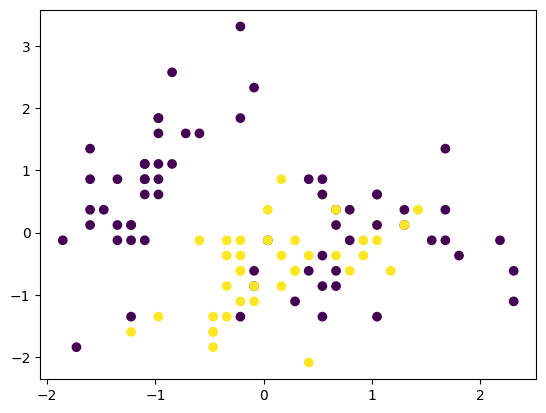

In [49]:
plt.scatter(X_train_ss[:, 0], X_train_ss[:, 1], c=y_train)
plt.show()

Задание 3.
Сравним качество для KNN и логрега.

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression()

Обучение

In [51]:
# Решение
# Обучите классификаторы

knn.fit(X_train_ss, y_train)
logreg.fit(X_train_ss, y_train);

Прогноз метки класса

In [52]:
# Получите прогнозы для тестовой выборки

y_test_pred_knn = knn.predict(X_test_ss)
y_test_pred_logreg = logreg.predict(X_test_ss)

In [53]:
y_test_pred_knn[:5]

array([0, 1, 0, 1, 0])

In [54]:
y_test_pred_logreg[:5]

array([1, 0, 1, 0, 0])

Прогноз вероятности класса

In [55]:
# получите прогнозы для тестовой выборки
y_test_proba_knn = knn.predict_proba(X_test_ss)[:, 1]
y_test_proba_logreg = logreg.predict_proba(X_test_ss)[:, 1]

In [56]:
y_test_proba_knn[:5]

array([0. , 0.8, 0.4, 1. , 0. ])

In [57]:
y_test_proba_logreg[:5]

array([0.70582039, 0.42794507, 0.53247213, 0.36230936, 0.09432892])

Метрика качества

In [58]:
from sklearn.metrics import accuracy_score
print(f'KNN: {accuracy_score(y_test, y_test_pred_knn)}')
print(f'LogReg: {accuracy_score(y_test, y_test_pred_logreg)}')

KNN: 0.7555555555555555
LogReg: 0.8444444444444444


Строим разделяющую поверность

Text(0.5, 1.0, 'Разделяющая поверхность для KNN')

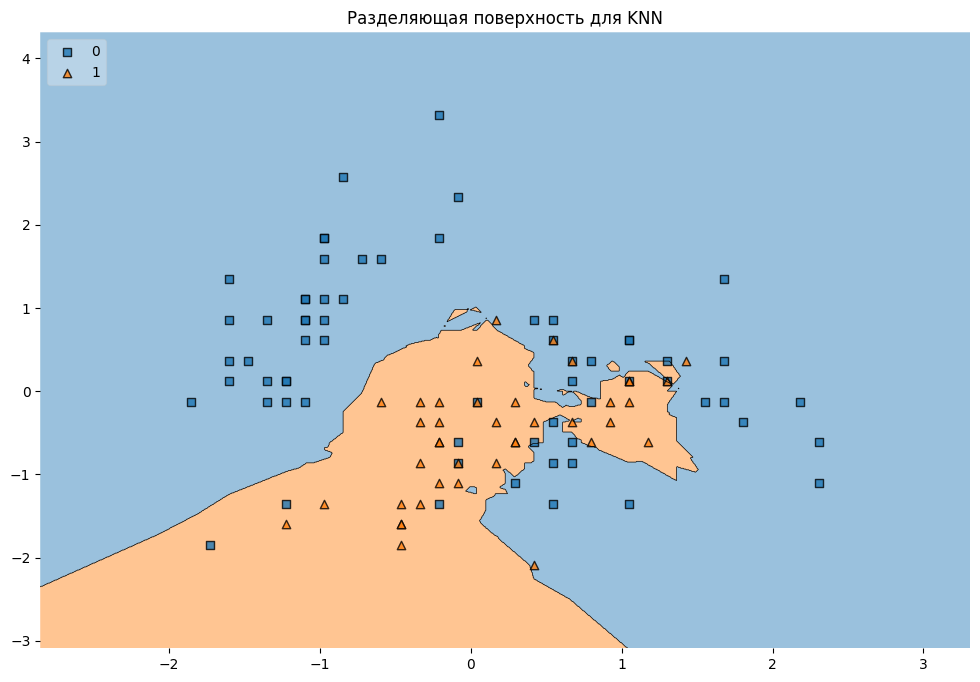

In [59]:
plt.figure(figsize=(12,8))
plot_decision_regions(X_train_ss, y_train, clf=knn, legend=2)
plt.title('Разделяющая поверхность для KNN')

Text(0.5, 1.0, 'Разделяющая поверхность для логрега')

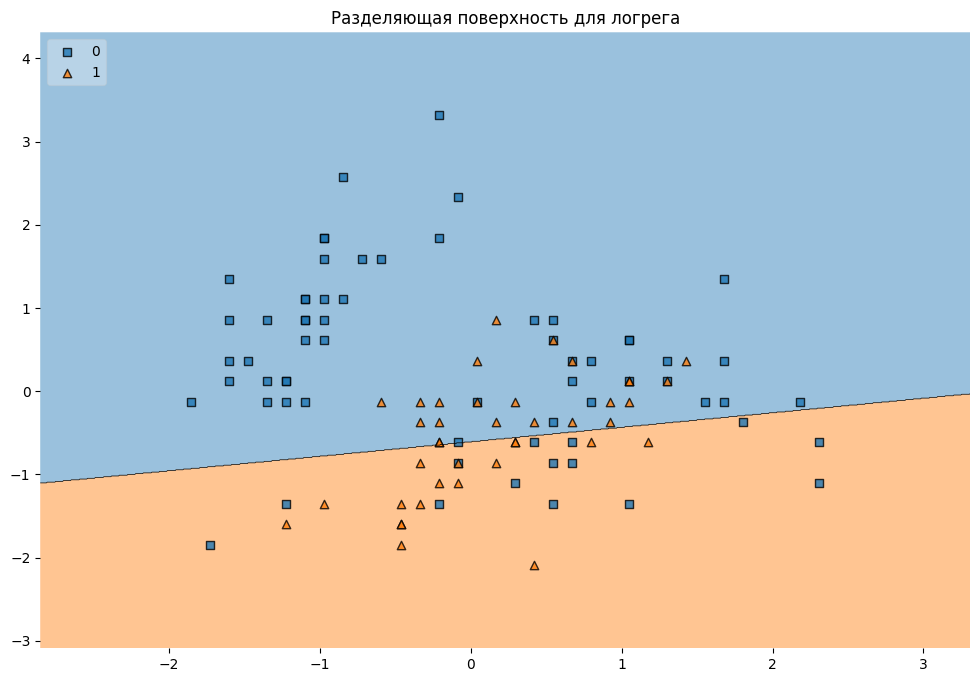

In [60]:
plt.figure(figsize=(12,8))
plot_decision_regions(X_train_ss, y_train, clf=logreg, legend=2)
plt.title('Разделяющая поверхность для логрега')

Теперь изучим свойства каждого классификатора по-отдельности. Начнём с логистической регрессии.

Задание 4.
Обучите три различные логистические регрессии с разным параметром регуляризации 
C
.

In [61]:
# Здесь должен быть ваш код

logreg_1 = LogisticRegression(C=0.01)
logreg_2 = LogisticRegression(C=0.05)
logreg_3 = LogisticRegression(C=10)

Правильность при C=0.01:  0.7777777777777778
Правильность при C=0.05:  0.8444444444444444
Правильность при C=10:  0.8444444444444444


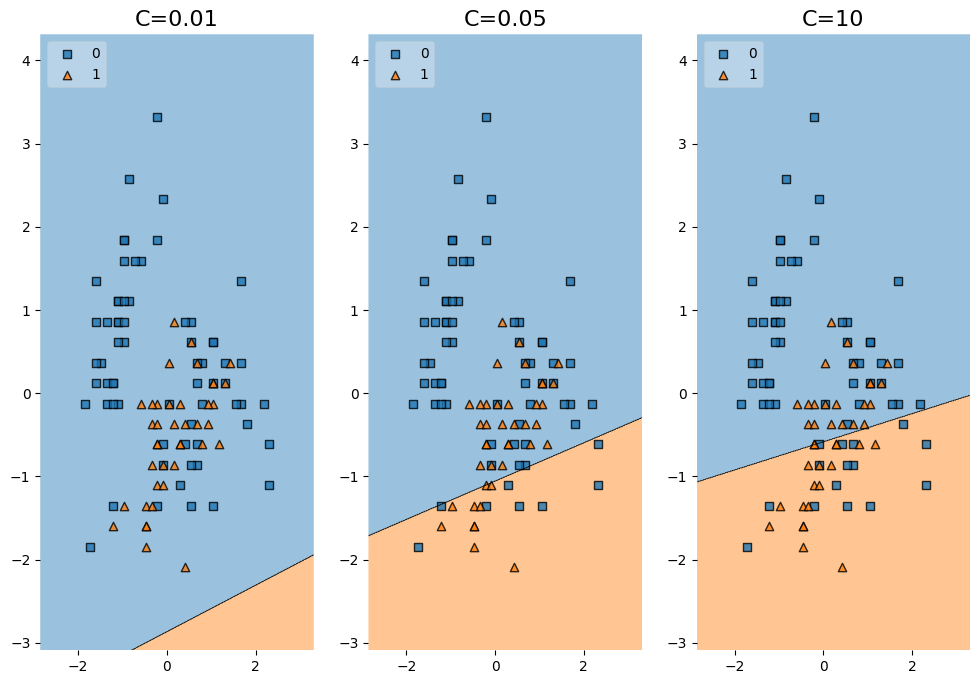

In [62]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 8))
pipes = [logreg_1, logreg_2, logreg_3]

for ind, clf in enumerate(pipes):
    clf.fit(X_train_ss, y_train)
    y_test_pred = clf.predict(X_test_ss)
    score = accuracy_score(y_test, y_test_pred)
    print(f"Правильность при C={clf.get_params()['C']}: ", score)
    fig = plot_decision_regions(X_train_ss, y_train, clf=clf, legend=2, ax=axes[ind])
    fig.set_title(f"C={clf.get_params()['C']}", fontsize=16)

Перейдём к KNN.

Задание 5.
Обучите три KNN с разным числом соседей.

In [63]:
# Здесь должен быть ваш код

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_3 = KNeighborsClassifier(n_neighbors=50)

Правильность при n_neighbors=1:  0.8222222222222222
Правильность при n_neighbors=5:  0.7555555555555555
Правильность при n_neighbors=50:  0.8


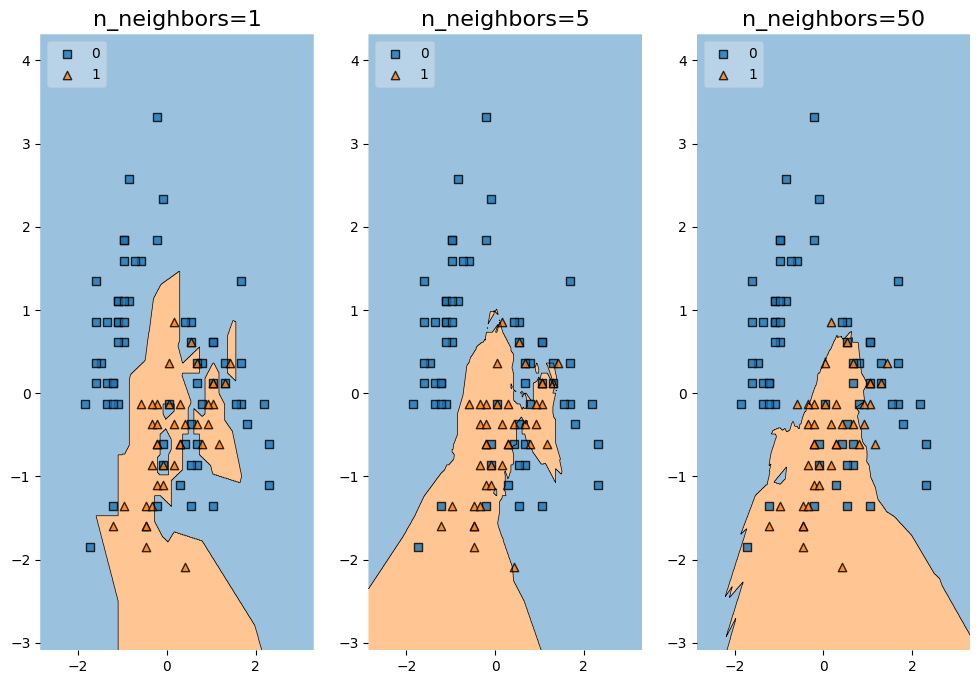

In [64]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 8))
pipes = [knn_1, knn_2, knn_3]

for ind, clf in enumerate(pipes):
    clf.fit(X_train_ss, y_train)
    y_test_pred = clf.predict(X_test_ss)
    score = accuracy_score(y_test, y_test_pred)
    print(f"Правильность при n_neighbors={clf.get_params()['n_neighbors']}: ", score)
    fig = plot_decision_regions(X_train_ss, y_train, clf=clf, legend=2, ax=axes[ind])
    fig.set_title(f"n_neighbors={clf.get_params()['n_neighbors']}", fontsize=16)

Дополнительные задания

1.Зачем мы используем StandardScaler? Что будет, если один из входных признаков умножить на 10^6?

In [65]:
X_test_wrong = X_test_ss.copy()
X_test_wrong[:, 0] = X_test_wrong[:, 0] * 1e6
print(knn.score(X_test_wrong, y_test))  # Сильно снизится
print(logreg.score(X_test_wrong, y_test)) # Тоже снизится

0.7777777777777778
0.5333333333333333


2.Найдите оптимальное значение для параметра регуляризации 
C
 логистической регрессии

In [66]:
C_grid = np.logspace(-2, 2, 40)
test_scores = []

for c in C_grid:
    clf = LogisticRegression(C=c, max_iter=1000)
    clf.fit(X_train_ss, y_train)
    y_test_pred = clf.predict(X_test_ss)
    score = accuracy_score(y_test, y_test_pred)
    test_scores.append(score)

best_idx = np.argmax(test_scores)
best_C = C_grid[best_idx]
print(f"Лучший C на тесте: {best_C}")
print(f"Точность на тесте при C={best_C}: {test_scores[best_idx]:.3f}")

Лучший C на тесте: 0.025719138090593445
Точность на тесте при C=0.025719138090593445: 0.867


3.Найдите оптимальное количество соседей 
K
 в методе ближайших соседей


In [67]:
n_range = range(1, 50)
test_scores = []

for n_neighbors in n_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_ss, y_train)
    y_test_pred = knn.predict(X_test_ss)
    score = accuracy_score(y_test, y_test_pred)
    test_scores.append(score)

best_idx = np.argmax(test_scores)
best_k = n_range[best_idx]
print(f"Лучший k на тесте: {best_k}")
print(f"Точность на тесте при k={best_k}: {test_scores[best_idx]:.3f}")

Лучший k на тесте: 34
Точность на тесте при k=34: 0.844


Нелинейные поверхности

In [68]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, shuffle=True, noise = 0.1, factor=0.1)

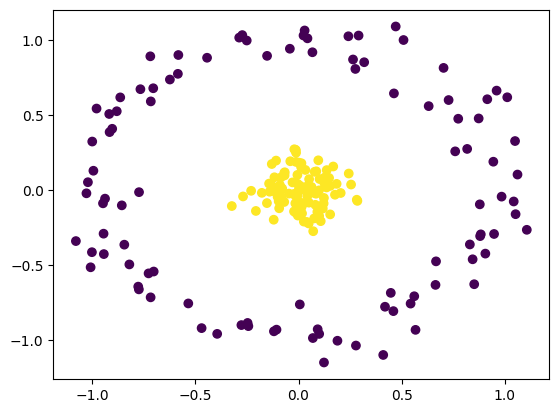

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [70]:
# делим данные на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [71]:
# обучаем модель
logreg = LogisticRegression()
logreg.fit(X_train, y_train);

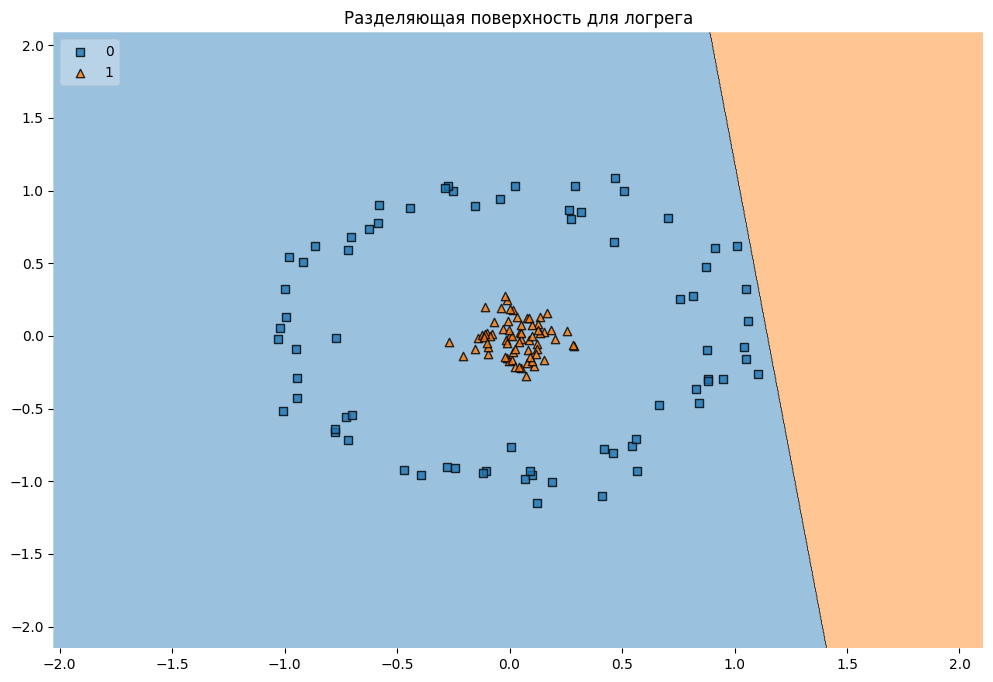

In [72]:
plt.figure(figsize=(12,8))
plot_decision_regions(X_train, y_train, clf=logreg, legend=2)
plt.title('Разделяющая поверхность для логрега');

Добавим новый признак
X3=X1^2+X2^2

In [73]:
X1 = X[:,0]
X2 = X[:,1]
X3 = X1**2+X2**2

X_new = np.c_[X1, X2, X3]

In [74]:
# делим данные на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=123)

Логистическая регрессия

In [75]:
# обучаем модель
logreg = LogisticRegression()
logreg.fit(X_train, y_train);


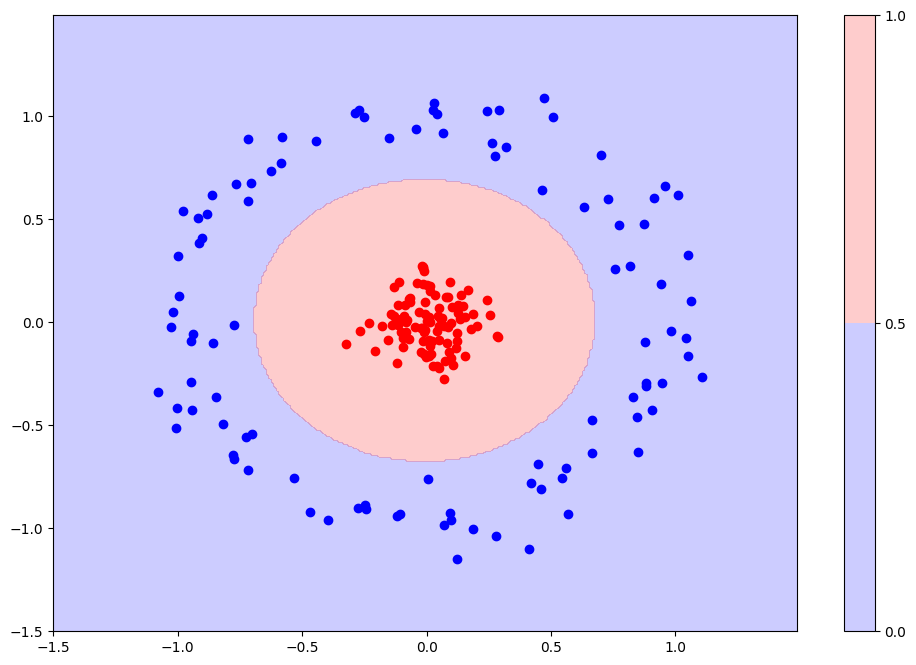

In [76]:
# Plot desicion border

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
xx0, xx1 = x0.ravel(), x1.ravel()
X_grid = np.c_[xx0, xx1, xx0**2 + xx1**2]

y_pred = logreg.predict(X_grid)
y_pred = y_pred.reshape(x0.shape)

plt.figure(figsize=(12,8))
plt.contourf(x0, x1, y_pred, levels=1, cmap=plt.cm.seismic, alpha=0.2)
plt.colorbar()
plt.scatter(X[y==0,0], X[y==0, 1], c='b')
plt.scatter(X[y==1,0], X[y==1, 1], c='r');

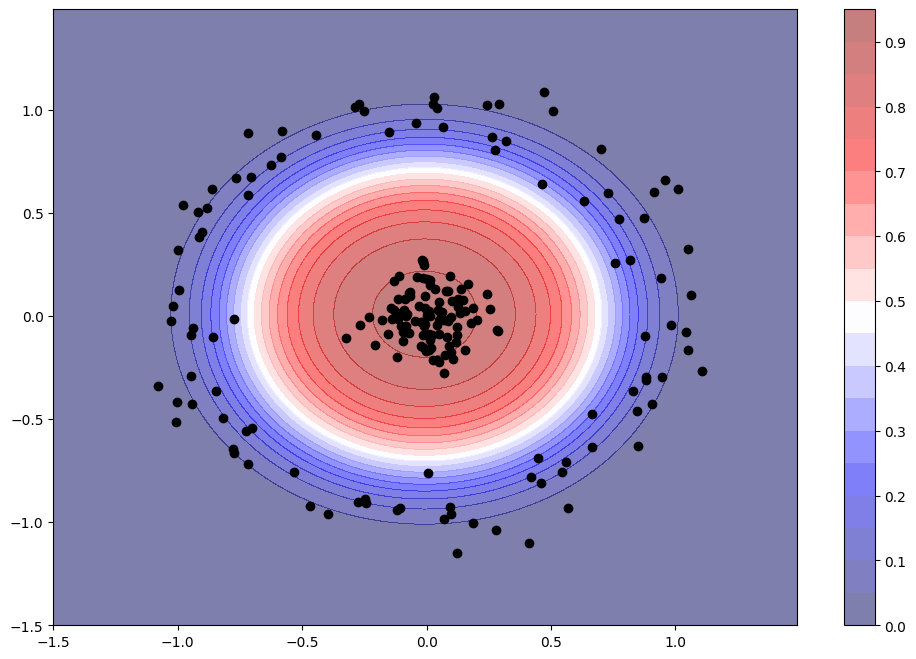

In [77]:
# Plot desicion border

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
xx0, xx1 = x0.ravel(), x1.ravel()
X_grid = np.c_[xx0, xx1, xx0**2 + xx1**2]

y_pred = logreg.predict_proba(X_grid)[:, 1]
y_pred = y_pred.reshape(x0.shape)

plt.figure(figsize=(12,8))
plt.contourf(x0, x1, y_pred, levels=20, cmap=plt.cm.seismic, alpha=0.5)
plt.colorbar()
plt.scatter(X[y==0,0], X[y==0, 1], c='0')
plt.scatter(X[y==1,0], X[y==1, 1], c='0');

Метод ближайших соседей

Задание 6. Реализуйте аналогичные вычисления для метода ближайших соседей


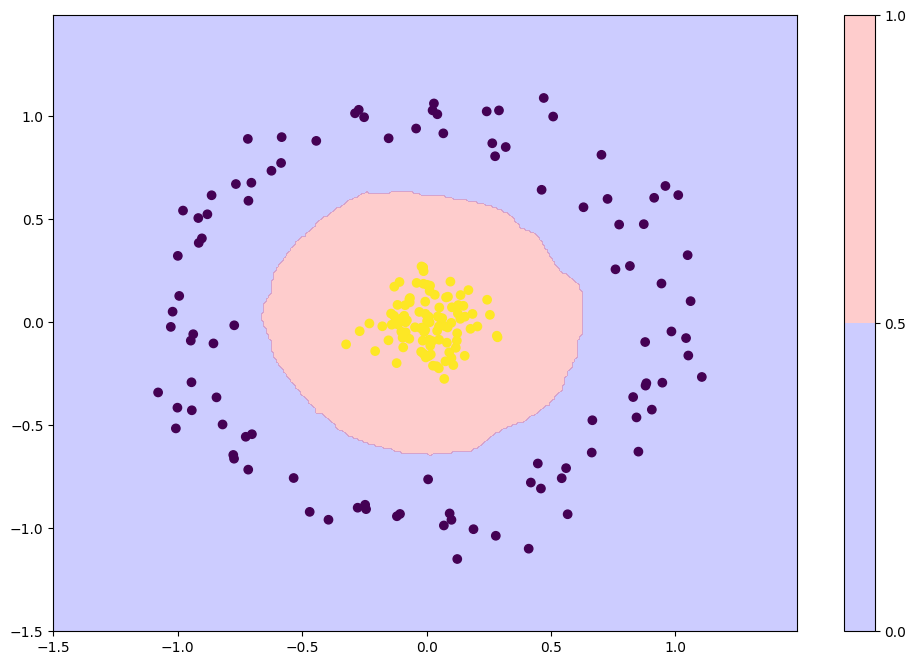

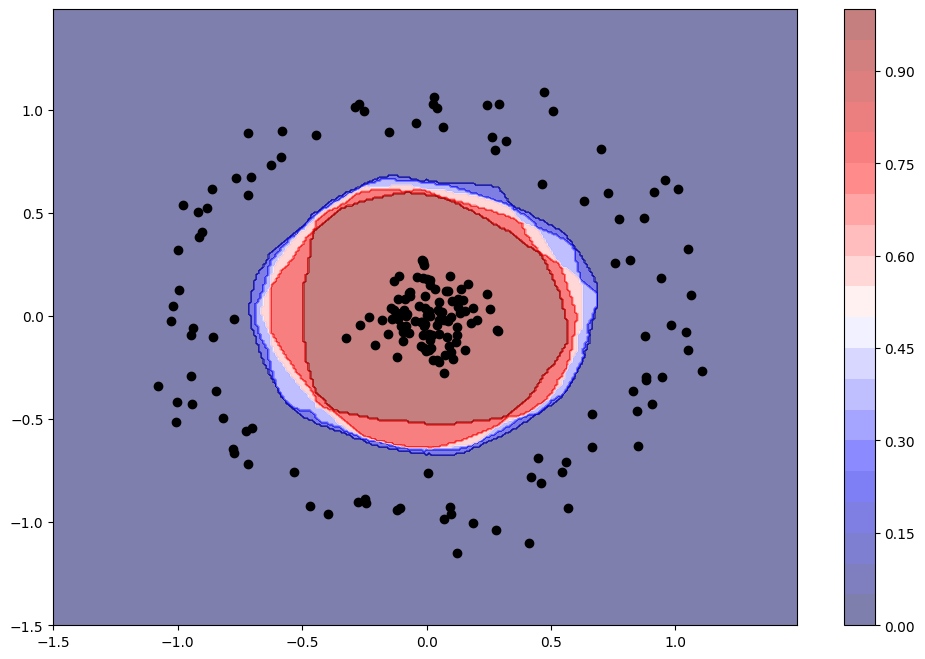

In [81]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Plot decision border
x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
xx0, xx1 = x0.ravel(), x1.ravel()
X_grid = np.c_[xx0, xx1, xx0**2 + xx1**2]
y_pred = knn.predict(X_grid)
y_pred = y_pred.reshape(x0.shape)

plt.figure(figsize=(12,8))
plt.contourf(x0, x1, y_pred, levels=1, cmap=plt.cm.seismic, alpha=0.2)
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c=y)

y_pred_proba = knn.predict_proba(X_grid)[:, 1]
y_pred_proba = y_pred_proba.reshape(x0.shape)

plt.figure(figsize=(12,8))
plt.contourf(x0, x1, y_pred_proba, levels=20, cmap=plt.cm.seismic, alpha=0.5)
plt.colorbar()
plt.scatter(X[y==0,0], X[y==0, 1], c='0')
plt.scatter(X[y==1,0], X[y==1, 1], c='0')